In [72]:
import numpy as np

In [73]:
import pandas as pd

In [74]:
import matplotlib.pyplot as plt

In [75]:
import scipy.stats as st
from scipy.stats import t
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

In [76]:
df = pd.read_csv('/Users/minsu/Downloads/문제1.csv', sep=',' , encoding='utf-8')

In [77]:
df.describe()

,압력,수율
count,12.000000,12.000000
mean,4.500000,88.566667
std,1.167748,1.970848
min,3.000000,84.500000
25%,3.750000,87.800000
50%,4.500000,88.700000
75%,5.250000,90.125000
max,6.000000,91.200000


In [78]:
df.head()

,압력,수율
0,3,89.2
1,3,88.5
2,3,87.8
3,4,90.2
4,4,88.9


In [79]:
grouped=df.groupby(df['압력'])
grouped.size()

압력
3    3
4    3
5    3
6    3
dtype: int64

<AxesSubplot:>

/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/opt/anaconda3/envs/abc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


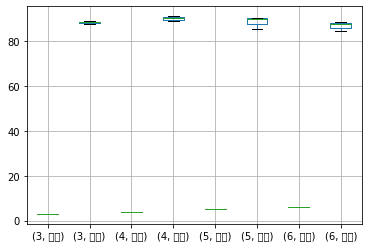

In [80]:
grouped.boxplot(subplots=False)

인자별 가시화

In [81]:
df_sample=df.sample(n=12)
df_sample

,압력,수율
9,6,87.8
8,5,85.6
7,5,90.1
0,3,89.2
5,4,91.2
11,6,88.5
3,4,90.2
6,5,90.5
10,6,84.5
2,3,87.8


In [82]:
# -가설수립

#1.귀무가설 : 압력이 제품 수율에 영향을 미치지 않는다
#2.대립가설 : 압력이 제품 수율에 영향을 미친다.

In [85]:
s_mean = np.mean(df_sample['압력'])
s_var = np.var(df_sample['압력'])
s_std = np.std(df_sample['압력'],ddof=1)

print("mean:{}, variance:{}, s_deviation:{}".format(s_mean, s_var, s_std))

mean:4.5, variance:1.25, s_deviation:1.1677484162422844


In [90]:
df = len(df_sample['압력'])-1
t_025 = t(df).ppf(0.975)
print("t_025:{}".format(t_025))

t_025:2.200985160082949


In [91]:
x_bar = np.mean(df_sample['압력'])
x_std = np.std(df_sample['압력'],ddof=1)

L_95 = x_bar - t_025*x_std/np.sqrt(12)
U_95 = x_bar + t_025*x_std/np.sqrt(12)
print("95% confidence interval: {}<mu<{}".format(L_95,U_95))

95% confidence interval: 3.7580480538942194<mu<5.241951946105781


In [122]:
# 95% 신뢰구간 추정

In [123]:
mu = 4
t0 = np.abs(x_bar-mu)/x_std*np.sqrt(12)
p_value = 1 - t(df).cdf(t0)
print("유의수준:0.05 , p_value:{}".format(p_value))

유의수준:0.05 , p_value:0.08304340675914779


In [121]:
# 유의수준 0.05% 보다 p값이 크기 때문에 귀무가설 채택

# 따라서 압력은 제품 수율에 영향을 안미친다.
